In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Display plots inline
%matplotlib inline


#  Load Sample Data 

In [2]:
# Load your dataset
df = pd.read_csv("C:/Users/Kiran Kumar/Desktop/Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Extract Features and Scale

In [3]:
# Select features for clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Apply KMeans

In [5]:
# Fit KMeans
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X_scaled)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans.labels_


C:\Users\Kiran Kumar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


# Visualize Clusters

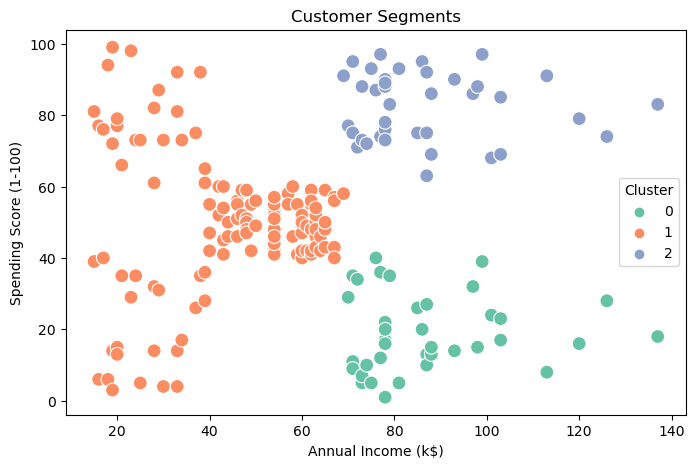

In [6]:
# Plot clusters
plt.figure(figsize=(8,5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', data=df, s=100)
plt.title('Customer Segments')
plt.show()


# Adding Centroids to the Plot

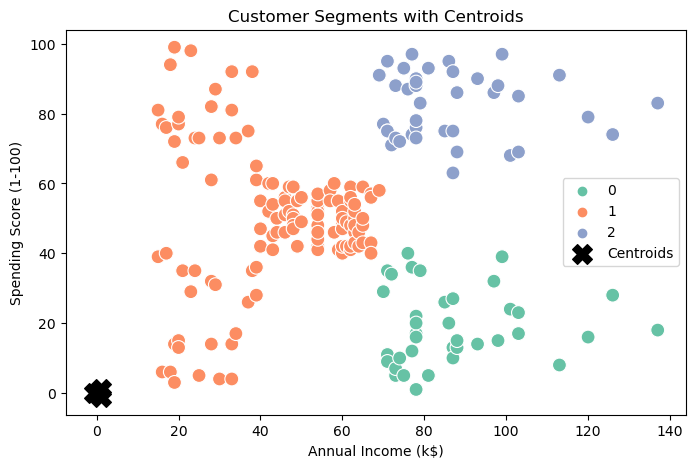

In [7]:
# Plot clusters with centroids
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', data=df, s=100)

# Plot centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], 
            c='black', s=200, marker='X', label='Centroids')

plt.title('Customer Segments with Centroids')
plt.legend()
plt.savefig('customer_segments_with_centroids.png')  # Save as image
plt.show()


# Adding Silhouette Score for model validation

In [8]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score: {score}")


Silhouette Score: 0.46658474419000145


In [9]:
print(kmeans.cluster_centers_)


[[ 1.00919971 -1.22553537]
 [-0.62618966 -0.01439238]
 [ 0.99158305  1.23950275]]


In [10]:
for idx, center in enumerate(kmeans.cluster_centers_):
    print(f"Centroid {idx}: x = {center[0]}, y = {center[1]}")


Centroid 0: x = 1.009199707301661, y = -1.225535374461913
Centroid 1: x = -0.6261896563994801, y = -0.014392383483299404
Centroid 2: x = 0.9915830476839198, y = 1.2395027537948333


# Code with Centroids on Plot

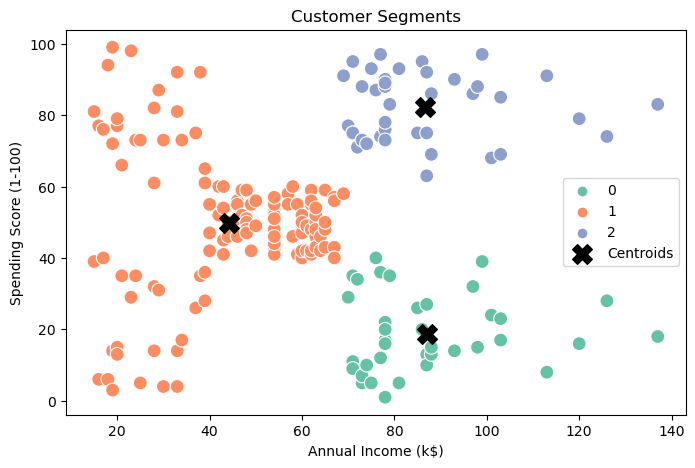

In [11]:
# Plot clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster', palette='Set2', data=df, s=100)

# Plot centroids
centers = scaler.inverse_transform(kmeans.cluster_centers_)  # convert scaled centroids back to original units
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, marker='X', label='Centroids')

plt.title('Customer Segments')
plt.legend()
plt.show()


In [14]:
plt.savefig('customer_clusters.png')


<Figure size 640x480 with 0 Axes>